In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import numpy as np
import datetime

plt.rcParams["figure.figsize"] = (14,4)

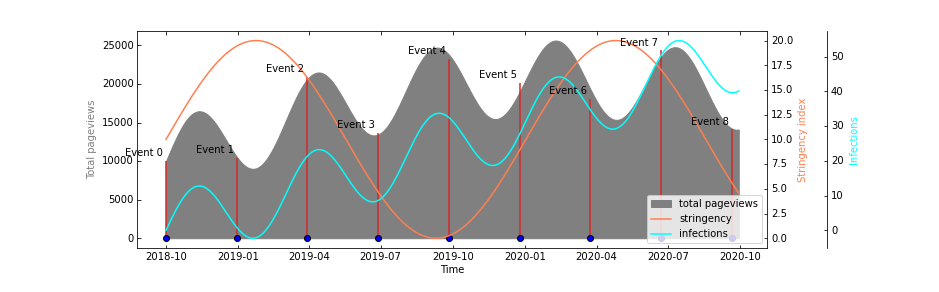

In [2]:
# create a timeline with total traffic, covid events, stringency for a sample country
ax0 = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

ax1 = ax0.twinx()
ax2 = ax0.twinx()

offset = 60
new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
ax2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=ax2,
                                    offset=(offset, 0))

ax2.axis["right"].toggle(all=True)
ax1.axis["right"].toggle(all=True)

ax0.set_xlabel("Time")
ax0.set_ylabel("Total pageviews")
ax1.set_ylabel("Stringency index")
ax2.set_ylabel("Infections")

start = datetime.datetime(2018, 10, 1)
dates = [start + datetime.timedelta(days=d) for d in range(2 * 365)]
events = {
    f"Event {i}": start + datetime.timedelta(days=d)
    for i, d in enumerate(range(0, 2 * 365, 3 * 30))
}
levels = np.linspace(0, 10, len(events))
levels = 10_000 + 1_000 * levels + 5_000 * np.sin(3 * levels) + 5_000 * np.sin(1.0/3.0 * levels) # pageviews

x = np.linspace(0, 10, len(dates))
stringency = 10 + 10 * np.sin(x)
infections = 5 * x + 10 * np.sin(3 * x)
pageviews = 10_000 + 1_000 * x + 5_000 * np.sin(3 * x) + 5_000 * np.sin(1.0/3.0 * x)

p0 = ax0.fill_between(dates, 0, pageviews, label="total pageviews", color="gray")
p1, = ax1.plot(dates, stringency, label="stringency", color="coral")
p2, = ax2.plot(dates, infections, label="infections", color="aqua")

ax0.vlines(events.values(), 0, levels, color="tab:red")
ax0.plot(events.values(), [0] * len(events.values()), "o", color="k", markerfacecolor="b")

# annotate lines
for (name, pos), lvl in zip(events.items(), levels):
    ax0.annotate(name, xy=(pos, lvl),
                xytext=(-3, np.sign(lvl)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if lvl > 0 else "top")

ax0.legend(loc="lower right")

ax0.axis["left"].label.set_color(p0.get_facecolor()[0])
ax1.axis["right"].label.set_color(p1.get_color())
ax2.axis["right"].label.set_color(p2.get_color())

plt.tight_layout()
plt.savefig("./figs/example-timeline.pdf")
plt.show()

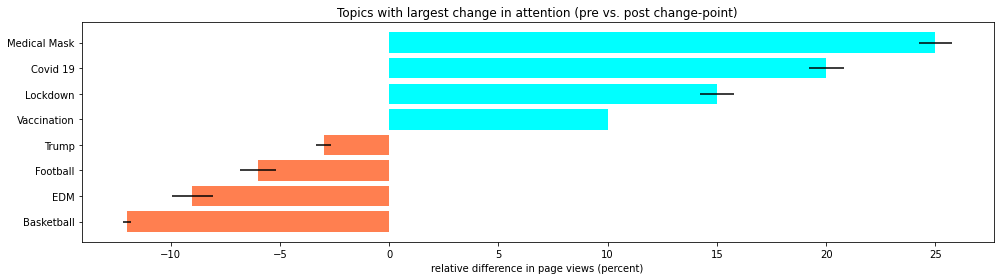

In [3]:
# create a horizontal bar plot with top increases and decreases
fig, ax = plt.subplots()
increased = ('Medical Mask', 'Covid 19', 'Lockdown', 'Vaccination')
decreased = ('Trump', 'Football', 'EDM', 'Basketball')
y_pos = np.arange(len(increased + decreased))
increased_performance = 5 * np.arange(len(increased)+1, 1, -1)
decreased_performance = -3 * np.arange(1, len(decreased)+1, 1)
error = np.random.rand(len(increased + decreased))

ax.barh(
    y_pos,
    np.hstack((increased_performance,decreased_performance)),
    color=np.hstack((["aqua"] * len(increased), ["coral"] * len(decreased))),
    xerr=error,
    align='center',
)
ax.set_yticks(y_pos)
ax.set_yticklabels(increased + decreased)
ax.invert_yaxis()
ax.set_xlabel('relative difference in page views (percent)')
ax.set_title("Topics with largest change in attention (pre vs. post change-point)")
plt.tight_layout()
plt.savefig("./figs/example-topic-attention-shift.pdf")
plt.show()

In [4]:
# 